In [1]:
import pandas as pd
import numpy as np
import os
from ast import literal_eval

pd.options.mode.chained_assignment = None

In [2]:
data_path = "./data"
if os.listdir(data_path) != ['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']:
    print("[ERROR] Please download and unzip the dataset in a subdirectory './data'.")
else:
    print("[INFO] The dataset is correctly placed.")

[INFO] The dataset is correctly placed.


### Loading the data

In [3]:
tmdb_credits = pd.read_csv(os.path.join(data_path, "tmdb_5000_credits.csv"))
tmdb_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
tmdb_movies = pd.read_csv(os.path.join(data_path, "tmdb_5000_movies.csv"))
tmdb_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
def parse_genres(genres):
    L=[]
    for genre in genres:
        L.append(genre['name'])
    if len(L) == 0:
        return np.nan
    return L


In [166]:
movie_genres = tmdb_movies[["genres", "release_date"]]
movie_genres.head()

,genres,release_date
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07


In [167]:
movie_genres["genres"] = movie_genres.genres.apply(lambda x: parse_genres(literal_eval(x)))
movie_genres.head()

,genres,release_date
0,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-10
1,"[Adventure, Fantasy, Action]",2007-05-19
2,"[Action, Adventure, Crime]",2015-10-26
3,"[Action, Crime, Drama, Thriller]",2012-07-16
4,"[Action, Adventure, Science Fiction]",2012-03-07


In [168]:
movie_genres = movie_genres.dropna().explode("genres").reset_index().drop(columns="index")
movie_genres.head()

,genres,release_date
0,Action,2009-12-10
1,Adventure,2009-12-10
2,Fantasy,2009-12-10
3,Science Fiction,2009-12-10
4,Adventure,2007-05-19


In [169]:
movie_genres['release_date'] = pd.to_datetime(movie_genres['release_date'])
movie_genres['year'] = movie_genres['release_date'].apply(lambda x: x.strftime('%Y'))
movie_genres.head()

,genres,release_date,year
0,Action,2009-12-10,2009
1,Adventure,2009-12-10,2009
2,Fantasy,2009-12-10,2009
3,Science Fiction,2009-12-10,2009
4,Adventure,2007-05-19,2007


In [170]:
# Use only given years and drop TV Movies and Foreign genres

genres_to_drop = ["TV Movie","Foreign", "Mystery", "Documentary", "Animation"]
movie_genres = movie_genres[movie_genres["year"].astype(int)>1965]
movie_genres = movie_genres[movie_genres["year"].astype(int)<2017]
movie_genres = movie_genres[~movie_genres["genres"].isin(genres_to_drop)]


In [171]:
df = movie_genres.groupby(["year","genres"],  as_index=False).count()
df.head()

,year,genres,release_date
0,1966,Action,1
1,1966,Adventure,1
2,1966,Comedy,2
3,1966,Crime,2
4,1966,Drama,2


In [172]:
df['norm_per_year'] = df['release_date'] / df.groupby('year')['release_date'].transform('sum')
df.head(40)

,year,genres,release_date,norm_per_year
0,1966,Action,1,0.066667
1,1966,Adventure,1,0.066667
2,1966,Comedy,2,0.133333
3,1966,Crime,2,0.133333
4,1966,Drama,2,0.133333
5,1966,Family,1,0.066667
6,1966,History,1,0.066667
7,1966,Music,1,0.066667
8,1966,Science Fiction,1,0.066667
9,1966,Thriller,2,0.133333


In [173]:
years = list(movie_genres.year.unique())
gens = list(movie_genres.genres.unique())

index = pd.MultiIndex.from_product([years, gens], names = ["year", "genres"])

zero_df = pd.DataFrame(index = index).reset_index()
zero_df["release_date"] = 0
zero_df["norm_per_year"] = 0.0

In [174]:
# We must have all genres in all years, so we populate 0 where missing
df3 = pd.concat([df,zero_df])
df3.drop_duplicates(subset=['year', 'genres'], inplace=True, keep='last')

In [175]:
zero_df.shape

(765, 4)

In [176]:
df = pd.concat([df,zero_df])

In [177]:
df.drop_duplicates(subset=['year', 'genres'], inplace=True, keep='first')

In [178]:
df.rename(columns={"release_date": "total_films"}, inplace=True)
df.head()

,year,genres,total_films,norm_per_year
0,1966,Action,1,0.066667
1,1966,Adventure,1,0.066667
2,1966,Comedy,2,0.133333
3,1966,Crime,2,0.133333
4,1966,Drama,2,0.133333


In [179]:
df.groupby("genres").count().shape

(15, 3)

In [180]:
df.sort_values(["year","genres"],inplace=True)

In [181]:
df.to_csv("mydata.csv")

#### Num_movies/genre

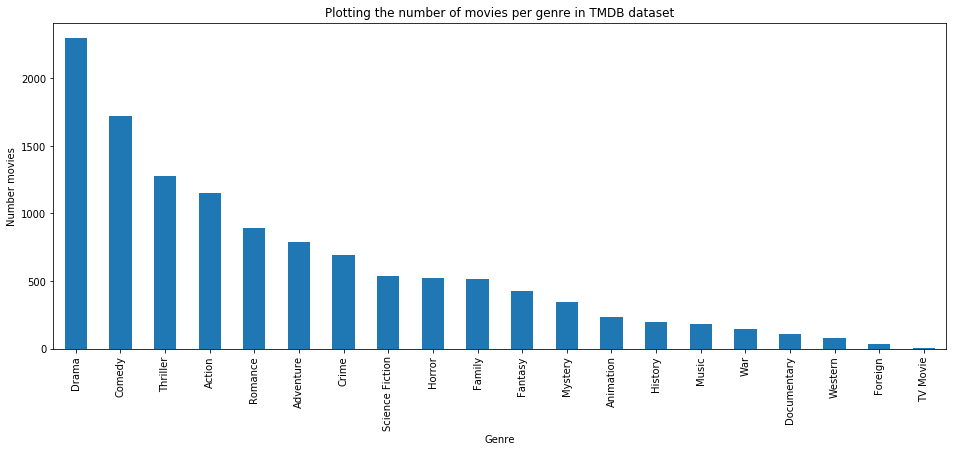

In [63]:
import numpy as np
plt.rcParams['figure.figsize'] = [16, 6]
def parse_genres(genres):
    L=[]
    for genre in genres:
        L.append(genre['name'])
    if len(L) == 0:
        return np.nan
    return L

movie_genres = tmdb_movies[["id", "genres"]]
movie_genres["genres"] = movie_genres.genres.apply(lambda x: parse_genres(literal_eval(x)))
movie_genres = movie_genres.dropna().explode("genres")
movie_genres['genres'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Number movies")
plt.title("Plotting the number of movies per genre in TMDB dataset")
plt.savefig('./images/num_movies_genre.png', bbox_inches='tight')
plt.show()


Drama, comedy, action and thriller are the most common genres to be found in films.